In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

## Splitting data into a training and validation set

In [3]:
train = pd.read_csv('train.csv').drop(columns=['Unnamed: 0'])
test = pd.read_csv('test_nolabels.csv').drop(columns=['S.No'])
X = train.drop(columns='LABELS')
y = train.loc[:,['LABELS']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=1, stratify=y)

## Standarization of the training and test points

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test = scaler.transform(test)

## Fitting our model

In [5]:
gnb = GaussianNB()

In [8]:
gnb.fit(X_train_norm,np.ravel(y_train))

GaussianNB()

## Obtaining accuracy and f1-score on validation set

In [11]:
val_preds = gnb.predict(X_val_norm)
accuracy = accuracy_score(y_val,val_preds)
print('Accuracy: {}%'.format(np.around(accuracy*100, 2)))

Accuracy: 71.12%


In [12]:
print(f1_score(y_val, val_preds, average="binary"))

0.7922492313047514


## Data visualization

In [13]:
print(classification_report(y_val,val_preds))

              precision    recall  f1-score   support

         0.0       0.58      0.48      0.53      4157
         1.0       0.76      0.83      0.79      8243

    accuracy                           0.71     12400
   macro avg       0.67      0.65      0.66     12400
weighted avg       0.70      0.71      0.70     12400



/Users/mahdikleit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


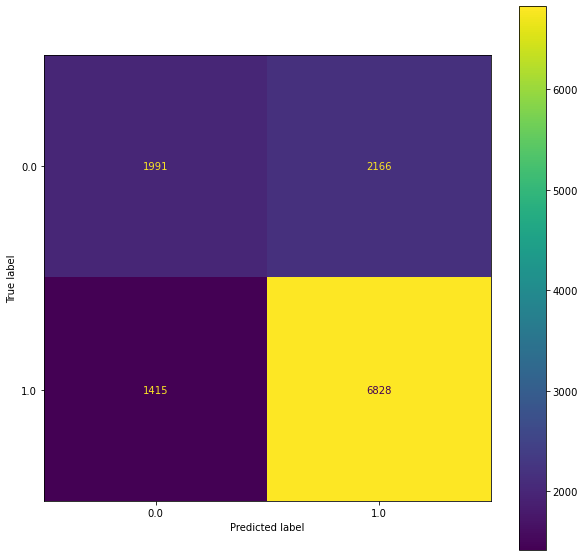

In [16]:
fig,ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(gnb,X_val_norm,y_val, ax=ax)
plt.show()

## Obtaing the predictions on the test set

In [18]:
test_labels = gnb.predict(X_test).astype(int)
df_submission = pd.DataFrame({'LABELS':test_labels})
df_submission.reset_index(inplace=True)
df_submission.rename(columns={'index':'S.No'},inplace=True)
df_submission.LABELS.value_counts()
df_submission.LABELS.value_counts()
df_submission.to_csv('predictions_weighted_NB.csv',index=False)